### Imports

In [1]:
def make_spider(row, title, color):
 
    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(3,3,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    #plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    #plt.ylim(0,40)

    # Ind1
    values=df.loc[row].drop('LeagueIndex').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import time
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select Style
#plt.style.use('fivethirtyeight')

In [3]:
sc2 = pd.read_csv('./starcraft.csv')
sc2.isnull().sum().sum()
sc2 = sc2.dropna()

### SC2 Graphs

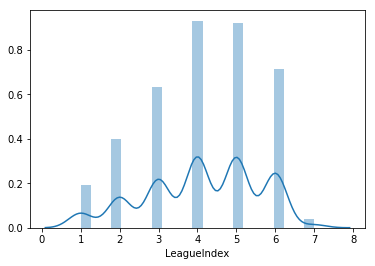

In [4]:
sns.distplot(sc2.LeagueIndex)

In [5]:
def makes_ID_N(j):
    r = 1
    if j in [1,2]:
        r = 1
    if j in [3]:
        r = 2
    if j in [4]:
        r = 3
    if j in [5]:
        r = 4
    if j in [6,7]:
        r = 5    
    return r

In [6]:
sc2['ID_N'] = sc2['LeagueIndex']

In [7]:
sc2.ID_N = sc2.ID_N.apply(lambda x:makes_ID_N(x))

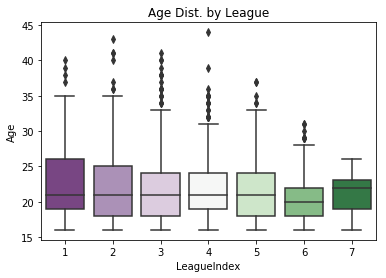

In [8]:
#ax = plt.subplot(1,2,1)
ax = sns.boxplot(x = 'LeagueIndex', y = 'Age', data=sc2, showfliers=True, palette="PRGn")
ax.set_title('Age Dist. by League');

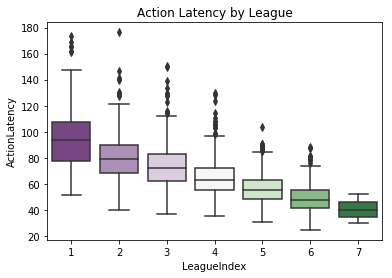

In [9]:
ax = sns.boxplot(x="LeagueIndex", y="ActionLatency", data=sc2, palette="PRGn")
ax.set_title('Action Latency by League');

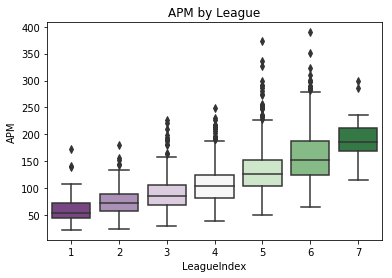

In [10]:
ax = sns.boxplot(x="LeagueIndex", y="APM", data=sc2, palette="PRGn")
ax.set_title('APM by League');

In [11]:
sc2 = sc2[sc2.TotalHours<4000]

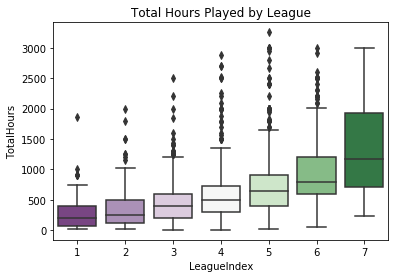

In [12]:
ax = sns.boxplot(x="LeagueIndex", y="TotalHours", data=sc2, palette="PRGn")
ax.set_title('Total Hours Played by League');

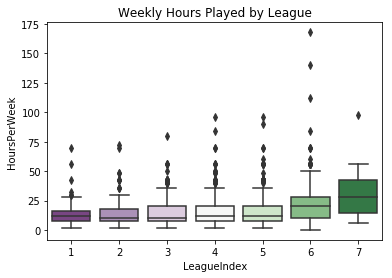

In [13]:
ax = sns.boxplot(x="LeagueIndex", y="HoursPerWeek", data=sc2, palette="PRGn")
ax.set_title('Weekly Hours Played by League');

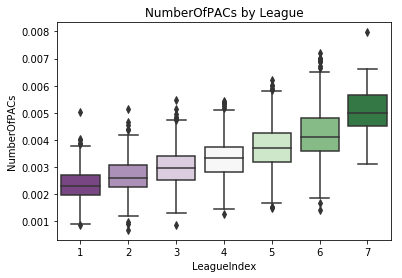

In [14]:
ax = sns.boxplot(x="LeagueIndex", y="NumberOfPACs", data=sc2, palette="PRGn")
ax.set_title('NumberOfPACs by League');

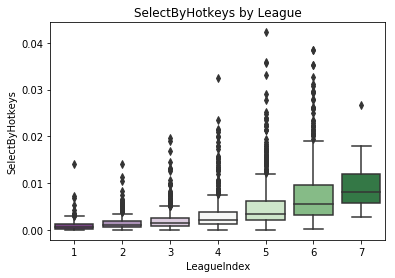

In [15]:
ax = sns.boxplot(x="LeagueIndex", y="SelectByHotkeys", data=sc2, palette="PRGn")
ax.set_title('SelectByHotkeys by League');

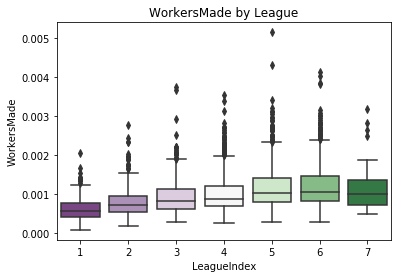

In [16]:
ax = sns.boxplot(x=sc2["LeagueIndex"], y=sc2["WorkersMade"], palette="PRGn", linewidth=1.5)
ax.set_title('WorkersMade by League');

### Correlation

In [17]:
#just reordering columns to put ID_N & League_Index next to eachother
cols = sc2.columns.tolist()
cols = cols[-1:] + cols[:-1]
sc2 = sc2[cols]

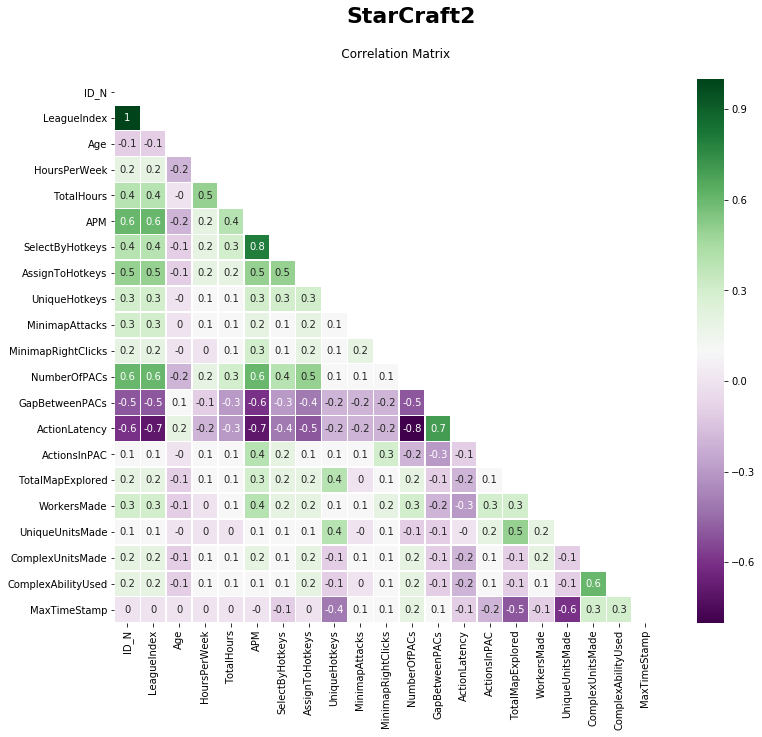

In [18]:
# Copy all df columns to new df, excluding GameID for easy matrix reading
c_matrix_df = sc2.drop(['GameID',],axis=1)

# Create figure
fig, axes = plt.subplots(nrows=1, ncols = 1, figsize = (14,10))
fig.suptitle('StarCraft2', fontsize=22, fontweight='bold')

# Generate a mask to hide the upper triangle for a cleaner heatmap.  Less visual noise the better.
mask = np.zeros_like(c_matrix_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Create correlation matrix heatma[]
r_matrix = c_matrix_df.corr().round(decimals=1)
sns.heatmap(r_matrix, mask=mask, square=True, cmap="PRGn", linewidths=.5, annot=True, fmt='g', 
            annot_kws={'size':10})
axes.set_title('     Correlation Matrix\n')
plt.show()

### Most Important Features

In [19]:
#Here we want to pull out what the correlation matrix dictates are the more important for League Rank

In [20]:
Important_Features = r_matrix[(r_matrix['LeagueIndex']>=0.5) | (r_matrix['LeagueIndex']<=-0.5)].LeagueIndex
Important_Features = Important_Features.drop(['LeagueIndex','ID_N'])
Important_Features

APM                0.6
AssignToHotkeys    0.5
NumberOfPACs       0.6
GapBetweenPACs    -0.5
ActionLatency     -0.7
Name: LeagueIndex, dtype: float64

In [21]:
ss = MinMaxScaler()

In [22]:
League_means = sc2.groupby('LeagueIndex').mean().drop(["GameID",'ID_N'],axis=1)
League_means_scaled = ss.fit_transform(League_means)
League_means_scaled = pd.DataFrame(League_means_scaled,columns=League_means.columns, index=League_means.index)

In [23]:
#Average States By League Rank
League_means

,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
LeagueIndex,,,,,,,,,,,,,,,,,,,
1,22.724551,13.125749,264.191617,59.539277,0.001081,0.000185,0.000045,0.000028,0.000208,0.002363,65.654987,95.404977,4.548287,0.000251,0.000626,0.000079,0.000015,0.000042,80558.586826
2,22.155620,13.296830,331.409222,74.780917,0.001536,0.000222,0.000045,0.000045,0.000276,0.002650,53.788886,81.270053,5.005949,0.000257,0.000801,0.000080,0.000024,0.000076,84271.573487
3,22.063636,13.923636,456.012727,89.857653,0.002192,0.000282,0.000049,0.000056,0.000331,0.002975,46.161211,73.735615,5.156399,0.000259,0.000917,0.000082,0.000044,0.000113,84174.189091
4,21.985167,14.009889,562.265760,105.680629,0.003128,0.000340,0.000053,0.000075,0.000368,0.003308,41.029132,64.824108,5.238048,0.000277,0.001006,0.000084,0.000065,0.000138,84619.960445
5,21.376412,16.148055,727.343789,131.299471,0.004947,0.000414,0.000064,0.000113,0.000427,0.003739,34.709563,56.152462,5.474388,0.000296,0.001167,0.000087,0.000076,0.000176,82272.506901
6,20.682334,21.121556,933.225284,158.282668,0.007373,0.000512,0.000074,0.000155,0.000472,0.004232,30.245788,48.958110,5.471698,0.000310,0.001213,0.000088,0.000078,0.000182,83878.405186
7,21.294118,31.411765,1333.411765,188.877847,0.009429,0.000725,0.000080,0.000316,0.000550,0.005116,22.930115,40.301015,5.185374,0.000309,0.001208,0.000079,0.000080,0.000268,96630.000000


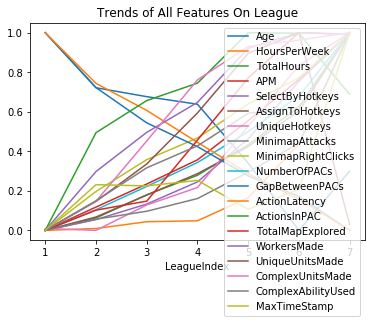

In [24]:
League_means_scaled.plot()
plt.title('Trends of All Features On League');

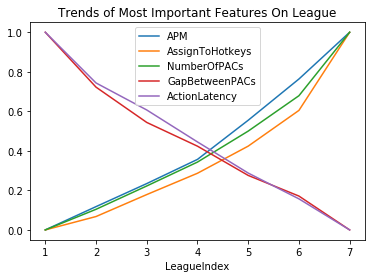

In [25]:
League_means_scaled[Important_Features.index].plot()
plt.title('Trends of Most Important Features On League');

In [26]:
League_means_scaled[Important_Features.index]

,APM,AssignToHotkeys,NumberOfPACs,GapBetweenPACs,ActionLatency
LeagueIndex,,,,,
1,0.000000,0.000000,0.000000,1.000000,1.000000
2,0.117843,0.067686,0.104283,0.722267,0.743486
3,0.234411,0.178804,0.222291,0.543737,0.606755
4,0.356749,0.286644,0.343222,0.423618,0.445033
5,0.554824,0.423904,0.499907,0.275705,0.287664
6,0.763449,0.604580,0.678891,0.171227,0.157105
7,1.000000,1.000000,1.000000,0.000000,0.000000


### Radar Charts

In [27]:
df = League_means_scaled[Important_Features.index].reset_index()
df.LeagueIndex = df.LeagueIndex.astype(str)

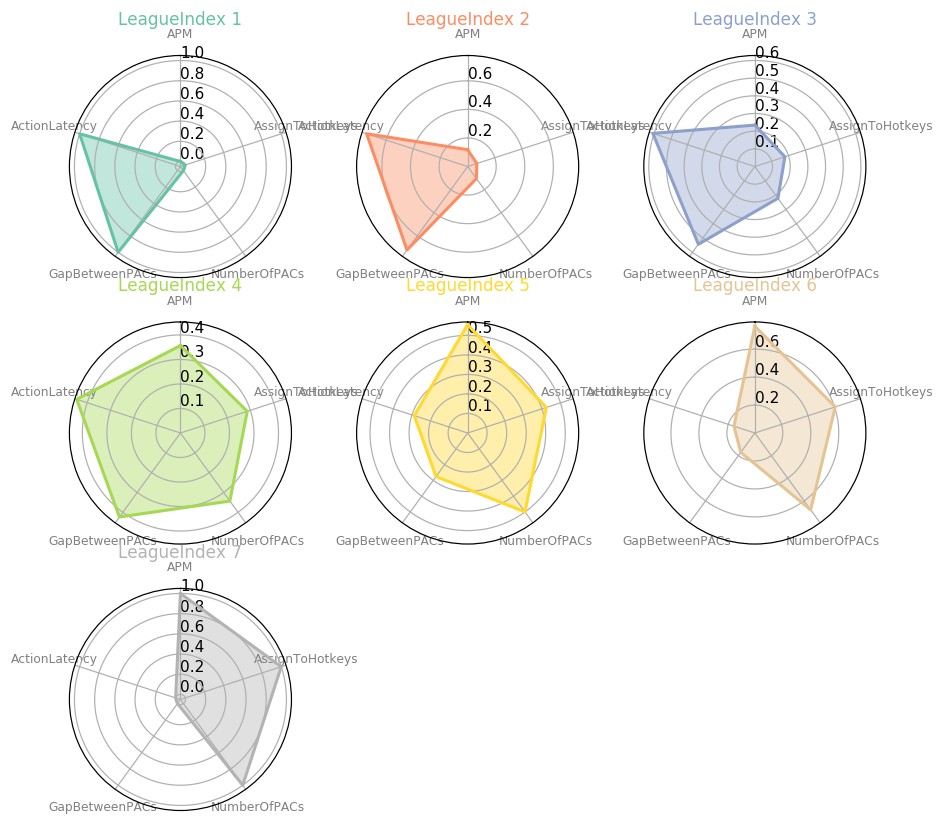

In [28]:
my_dpi=110
plt.figure(figsize=(1050/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider(row=row, title='LeagueIndex '+df['LeagueIndex'][row], color=my_palette(row))

### Pairplots

In [29]:
[i for i in Important_Features.index]#.append("LeagueIndex")

['APM', 'AssignToHotkeys', 'NumberOfPACs', 'GapBetweenPACs', 'ActionLatency']

In [30]:
lt = list(Important_Features.index)
lt.append("LeagueIndex")
lt

['APM',
 'AssignToHotkeys',
 'NumberOfPACs',
 'GapBetweenPACs',
 'ActionLatency',
 'LeagueIndex']

In [31]:
League_means_scaled

,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
LeagueIndex,,,,,,,,,,,,,,,,,,,
1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009283,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.721415,0.009356,0.062866,0.117843,0.054436,0.067686,0.000000,0.056586,0.196898,0.104283,0.722267,0.743486,0.494182,0.102396,0.297601,0.146501,0.147462,0.149775,0.231031
3,0.676374,0.043634,0.179403,0.234411,0.133036,0.178804,0.128492,0.096684,0.357826,0.222291,0.543737,0.606755,0.656637,0.147895,0.495774,0.335905,0.452110,0.316349,0.224971
4,0.637950,0.048351,0.278777,0.356749,0.245224,0.286644,0.216695,0.160922,0.467081,0.343222,0.423618,0.445033,0.744801,0.456684,0.647506,0.594115,0.761284,0.427429,0.252708
5,0.339865,0.165280,0.433168,0.554824,0.463084,0.423904,0.526304,0.294083,0.639847,0.499907,0.275705,0.287664,1.000000,0.771606,0.920923,0.895561,0.930261,0.592052,0.106644
6,0.000000,0.437263,0.625721,0.763449,0.753698,0.604580,0.833848,0.441417,0.772062,0.678891,0.171227,0.157105,0.997095,1.000000,1.000000,1.000000,0.962608,0.621034,0.206567
7,0.299568,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.687924,0.992050,0.990489,0.029956,1.000000,1.000000,1.000000


In [32]:
#sns.pairplot(sc2[lt].reset_index(),hue='LeagueIndex',)

### SDV / PCA

In [33]:
from sklearn.decomposition import PCA,TruncatedSVD

In [34]:
SVD = TruncatedSVD(n_components=16)

In [35]:
sc2.head()

,ID_N,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,4,52,5,27.0,10.0,3000.0,143.7180,0.003515,0.000220,0.000055,...,0.004849,32.6677,40.8673,4.7508,0.000220,0.001397,0.000047,0.0,0.000000,127448
2,3,56,4,30.0,10.0,200.0,69.9612,0.001101,0.000336,0.000042,...,0.002926,44.6475,75.3548,4.0430,0.000231,0.000745,0.000063,0.0,0.000189,95360
3,2,57,3,19.0,20.0,400.0,107.6016,0.001034,0.000213,0.000011,...,0.003783,29.2203,53.7352,4.9155,0.000202,0.000426,0.000075,0.0,0.000384,93852
4,2,58,3,32.0,10.0,500.0,122.8908,0.001136,0.000327,0.000039,...,0.002368,22.6885,62.0813,9.3740,0.000289,0.001174,0.000077,0.0,0.000019,51936
5,1,60,2,27.0,6.0,70.0,44.4570,0.000978,0.000255,0.000021,...,0.002425,76.4405,98.7719,3.0965,0.000170,0.000372,0.000064,0.0,0.000000,94032


In [36]:
to_drop = ['GameID','LeagueIndex','ID_N',
          #  'TotalHours','HoursPerWeek','MaxTimeStamp',
           
          ]
target = sc2.ID_N

In [37]:
data = sc2.drop(to_drop,axis=1)

In [38]:
eg1 = SVD.fit_transform(data)

In [39]:
feature_names = data.columns

In [40]:
SVD.explained_variance_

array([1.13108665e+09, 2.69035250e+05, 2.87386744e+03, 1.29463747e+03,
       1.13466796e+02, 1.09155140e+02, 1.96976135e+01, 1.57560954e+00,
       5.83323282e-06, 2.05738133e-07, 1.69934688e-07, 1.02120958e-07,
       6.41305054e-08, 2.98310447e-08, 2.08805914e-08, 6.53630564e-09])

In [41]:
#did not end up using SVD

### Model Generation

In [42]:
import lightgbm as lgb
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2 ,random_state=42)

In [43]:
params_opt = {
           'n_estimators': [i for i in range(10,100)],
           #'num_leaves': [x for x in range(20,50)],
           #'max_depth': [x for x in range(5,25)],
           #'feature_fraction': [x / 1000.0 for x in range(825,900,25)],
           #'bagging_fraction': [x / 1000.0 for x in range(825,900,25)],
        #'reg_lambda' : [x / 100.0 for x in range(0,110,10)],
}

In [44]:
Ada = AdaBoostClassifier()
Lgb = lgb.LGBMClassifier()#objective ='multiclass')
Gb = GradientBoostingClassifier()

In [45]:
model = Ada

In [46]:
rs_iter = 30

In [50]:
rs = RandomizedSearchCV(
    model, 
    params_opt, 
    n_iter=rs_iter,
    cv=4,
    scoring='accuracy',
    verbose=1)

rs_start = time.time()
rs.fit(X_train,y_train)
rs_stop = time.time()
rs_time = rs_stop - rs_start

Fitting 4 folds for each of 30 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.2min finished


In [51]:
rs.score(X_train,y_train)

0.4480421686746988

In [52]:
rs.score(X_test,y_test)

0.4496240601503759

In [53]:
best_rs_score = rs.score(X_test,y_test)

In [54]:
#cm = confusion_matrix(y_test,rs.predict(X_test))

In [55]:
#pd.Series(dict(zip(feature_names,rs.best_estimator_.feature_importances_)))
#somethings up here, this does not make sense

### Bay

In [56]:
%pylab inline  
import GPy
import GPyOpt
import numpy as np
from sklearn.model_selection import cross_val_score

Populating the interactive namespace from numpy and matplotlib


/Users/Nahel/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['axes', 'pi']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### SVC

In [101]:
from sklearn.svm import SVC
nfold = 3
def fit_svr_val(x):
    #np.exp(x) is where we make the domain exponental
    x = np.atleast_2d(np.exp(x))
    fs = np.zeros((x.shape[0],1))
    for i in range(x.shape[0]):
        fs[i] = 0 
        for n in range(nfold):
            idx = np.array(range(X_train.shape[0]))
            idx_valid = np.logical_and(idx>=X_train.shape[0]/nfold*n, idx<X_train.shape[0]/nfold*(n+1))
            idx_train = np.logical_not(idx_valid)
            svc = SVC(C=x[i,0], gamma=x[i,1])
            svc.fit(X_train[idx_train],y_train[idx_train])
            fs[i] += np.sqrt(np.square(svc.predict(X_train[idx_valid])-y_train[idx_valid]).mean())
        fs[i] *= 1./nfold
    return fs

domain       =[{'name': 'C',      'type': 'continuous', 'domain': (0.,7.)},
               {'name': 'gamma',  'type': 'continuous', 'domain': (-12.,-2.)}]

opt = GPyOpt.methods.BayesianOptimization(f = fit_svr_val,            # function to optimize       
                                          domain = domain,         # box-constraints of the problem
                                          acquisition_type ='LCB',  # LCB acquisition
                                          acquisition_weight = 0.1)   # Exploration exploitation

The set cost function is ignored! LCB acquisition does not make sense with cost.


In [102]:
opt.run_optimization(max_iter=50)

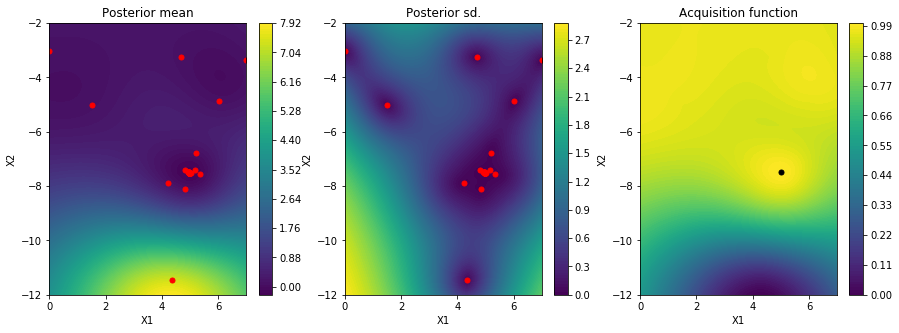

In [104]:
opt.plot_acquisition()
#opt.plot_convergence()

In [117]:
opt.x_opt

array([ 5.02939103, -7.52367151])

In [123]:
svm = SVC(C=np.exp(opt.x_opt)[0],gamma=np.exp(opt.x_opt)[1])
svm.fit(X=X_train,y=y_train)
svm.score(X_test,y_test)

0.22406015037593985

### ADA

In [ ]:
domain =[{'name': 'n_estimators', 'type': 'continuous', 'domain': (10,100)}]

In [ ]:
def sample_loss(j):
    return cross_val_score(AdaBoostClassifier(n_estimators=int(j[0])), 
                           X=X_train, y=y_train, 
                        scoring='accuracy', cv=4).mean()

In [97]:
bay_start =  time.time()
opt = GPyOpt.methods.BayesianOptimization(
    f = sample_loss, 
    domain = domain,
    acquisition_type ='EI',
    de_duplication=True,
    initial_design_numdata=10,
    normalize_Y=False,
    )
bay_iter = 20
opt.run_optimization(bay_iter)
bay_stop =  time.time()
bay_time = bay_stop - bay_start

KeyboardInterrupt: 

In [ ]:
#opt.plot_acquisition()
opt.plot_convergence()

In [63]:
bay_n = int(round(opt.x_opt[0]))

In [64]:
best_bay_score = AdaBoostClassifier(n_estimators=bay_n).fit(X_train,y_train).score(X_test,y_test)

In [77]:
print("best score with random searching across {} params, taking {} seconds.\n{}".format(rs_iter, round(rs_time,3), round(best_rs_score,5)))

best score with random searching across 30 params, taking 70.078 seconds.
0.44962


In [78]:
print("best score with bay searching across {} params, taking {} seconds.\n{}".format(bay_iter+10, round(bay_time,3), round(best_bay_score,5)))

best score with bay searching across 30 params, taking 91.498 seconds.
0.44962


Huh.. well I guess I was expecting Bay to be better

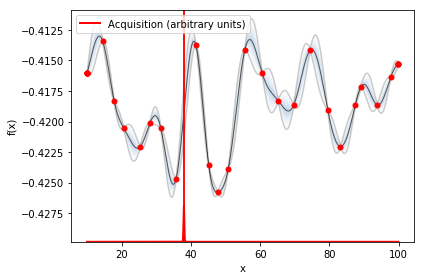

In [80]:
opt.plot_acquisition()

Well it seems like the two models agree with which is the best param